In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

<h2>
    Load the dataset.
</h2>

In [2]:
column_names = ['letter','x-box','y-box','width','height','onpix','x-bar','y-bar',
                'x2bar','y2bar','xybar','x2ybr','xy2br','x-ege','xegvy','y-ege','yegvx']
df=pd.read_csv("letter-recognition.data",names=column_names)
df.head()

,letter,x-box,y-box,width,height,onpix,x-bar,y-bar,x2bar,y2bar,xybar,x2ybr,xy2br,x-ege,xegvy,y-ege,yegvx
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [3]:
df.columns

Index(['letter', 'x-box', 'y-box', 'width', 'height', 'onpix', 'x-bar',
       'y-bar', 'x2bar', 'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-ege', 'xegvy',
       'y-ege', 'yegvx'],
      dtype='object')

<h2>
    Preprocessing the dataset.
</h2>

In [4]:
X = df.drop('letter', axis=1)
y = df['letter']

In [5]:
# Encode target labels (A-Z) to integers
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

In [6]:
# One-hot encode for multiclass classification
y_categorical = to_categorical(y_encoded)

In [7]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.2, random_state=42)

<h2>
    Building the Deep Neural Network
</h2>

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(16,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')  # 26 output neurons for 26 letters
])

C:\Users\Ayush\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Step 4: Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

<h2>
    Training the model.
</h2>

In [11]:
# Step 5: Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=64, validation_split=0.1)


Epoch 1/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3495 - loss: 2.4660 - val_accuracy: 0.7400 - val_loss: 0.9941
Epoch 2/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7553 - loss: 0.8983 - val_accuracy: 0.7962 - val_loss: 0.7129
Epoch 3/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8121 - loss: 0.6625 - val_accuracy: 0.8331 - val_loss: 0.5769
Epoch 4/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8428 - loss: 0.5453 - val_accuracy: 0.8556 - val_loss: 0.4966
Epoch 5/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8690 - loss: 0.4558 - val_accuracy: 0.8631 - val_loss: 0.4364
Epoch 6/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8857 - loss: 0.4006 - val_accuracy: 0.8775 - val_loss: 0.3876
Epoch 7/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8990 - loss: 0.3531 - val_accuracy: 0.8938 - val_loss: 0.3574
Epoch 8/30
225/225 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9099 - loss: 0.3109 - val_accuracy: 0.

<h2>
    Evaluating the model.
</h2>

In [12]:
# Step 6: Evaluate
loss, acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {acc:.4f}")

125/125 - 1s - 5ms/step - accuracy: 0.9528 - loss: 0.1496
Test Accuracy: 0.9528


In [13]:
preds = model.predict(X_test)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [14]:
predicted_classes = preds.argmax(axis=1)  # returns class index with max prob
decoded_preds = encoder.inverse_transform(predicted_classes)

<h2>
    Predictions.
</h2>

In [15]:
# True labels (also decode them)
true_classes = y_test.argmax(axis=1)
true_labels = encoder.inverse_transform(true_classes)

# Show side by side
for i in range(10):  # show first 10
    print(f"Predicted: {decoded_preds[i]}  |  Actual: {true_labels[i]}")


Predicted: X  |  Actual: T
Predicted: L  |  Actual: L
Predicted: A  |  Actual: A
Predicted: E  |  Actual: E
Predicted: Q  |  Actual: Q
Predicted: E  |  Actual: E
Predicted: O  |  Actual: O
Predicted: Q  |  Actual: Q
Predicted: G  |  Actual: G
Predicted: O  |  Actual: O


<h2>
    Testing Accuracy.
</h2>

In [16]:
accuracy_percentage = np.mean(decoded_preds == true_labels) * 100
print(f"Sample Accuracy: {accuracy_percentage:.2f}%")

Sample Accuracy: 95.28%


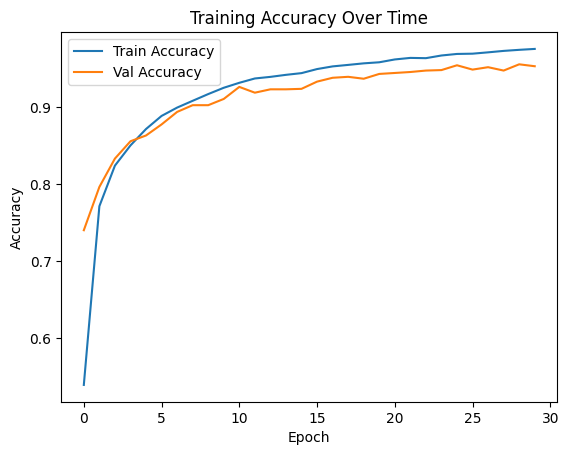

In [17]:
# Step 7: Plot training history
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training Accuracy Over Time")
plt.show()